EDA

Step 1: Import Python Libraries

Import all libraries which are required for our analysis, such as Data Loading, Statistical analysis, Visualizations, Data Transformations, Merge and Joins, etc.

In [1]:
#pip install autoviz

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
#from autoviz.AutoViz_Class import AutoViz_Class

Step 2: Reading Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing data from file project-data.csv

In [4]:
#AV = AutoViz_Class()
#liver_df = AV.AutoViz("/content/drive/MyDrive/EXCELR/PROJECT/PROJECT 2 LIVER DIEASES/project-data.csv", sep=';', chart_format='Server')

In [5]:
liver_df = pd.read_csv("/content/drive/MyDrive/EXCELR/PROJECT/PROJECT 2 LIVER DIEASES/project-data.csv", sep=';')

In [6]:
liver_df.head()

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,no_disease,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69
1,no_disease,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,no_disease,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,no_disease,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,no_disease,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [7]:
liver_df.shape

(615, 13)

In [8]:
liver_df.columns

Index(['category', 'age', 'sex', 'albumin', 'alkaline_phosphatase',
       'alanine_aminotransferase', 'aspartate_aminotransferase', 'bilirubin',
       'cholinesterase', 'cholesterol', 'creatinina',
       'gamma_glutamyl_transferase ', 'protein   '],
      dtype='object')

In [9]:
repl = {'cirrhosis':'0', 'fibrosis':'1', 'hepatitis':'2', 'no_disease':'3', 'suspect_disease':'4'}
liver_df['cat'] = liver_df['category'].replace(repl, regex=True)

Renaming Columns

In [10]:
# Total number of columns in the dataset
liver_df.columns = liver_df.columns.str.upper()

In [11]:
liver_df = liver_df.astype({'CAT':'int'})

In [12]:
liver_df.columns

Index(['CATEGORY', 'AGE', 'SEX', 'ALBUMIN', 'ALKALINE_PHOSPHATASE',
       'ALANINE_AMINOTRANSFERASE', 'ASPARTATE_AMINOTRANSFERASE', 'BILIRUBIN',
       'CHOLINESTERASE', 'CHOLESTEROL', 'CREATININA',
       'GAMMA_GLUTAMYL_TRANSFERASE ', 'PROTEIN   ', 'CAT'],
      dtype='object')

Descriptive Analysis

In [13]:
#info() helps to understand the data type and information about data, including the number of records in each column, data having null or not null, Data type, the memory usage of the dataset
# Information about the dataset
liver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CATEGORY                     615 non-null    object 
 1   AGE                          615 non-null    int64  
 2   SEX                          615 non-null    object 
 3   ALBUMIN                      614 non-null    float64
 4   ALKALINE_PHOSPHATASE         597 non-null    float64
 5   ALANINE_AMINOTRANSFERASE     614 non-null    float64
 6   ASPARTATE_AMINOTRANSFERASE   615 non-null    float64
 7   BILIRUBIN                    615 non-null    float64
 8   CHOLINESTERASE               615 non-null    float64
 9   CHOLESTEROL                  605 non-null    float64
 10  CREATININA                   615 non-null    float64
 11  GAMMA_GLUTAMYL_TRANSFERASE   615 non-null    float64
 12  PROTEIN                      615 non-null    object 
 13  CAT                 

In [14]:
# To know more about the dataset
liver_df.describe()

,AGE,ALBUMIN,ALKALINE_PHOSPHATASE,ALANINE_AMINOTRANSFERASE,ASPARTATE_AMINOTRANSFERASE,BILIRUBIN,CHOLINESTERASE,CHOLESTEROL,CREATININA,GAMMA_GLUTAMYL_TRANSFERASE,CAT
count,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,615.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,2.757724
std,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,0.753819
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,0.000000
25%,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,3.000000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,3.000000
75%,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,3.000000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,4.000000


Missing Values Calculation

In [15]:
# check for missing values
liver_df.isna().sum() # The result shows that there are no missing values

CATEGORY                        0
AGE                             0
SEX                             0
ALBUMIN                         1
ALKALINE_PHOSPHATASE           18
ALANINE_AMINOTRANSFERASE        1
ASPARTATE_AMINOTRANSFERASE      0
BILIRUBIN                       0
CHOLINESTERASE                  0
CHOLESTEROL                    10
CREATININA                      0
GAMMA_GLUTAMYL_TRANSFERASE      0
PROTEIN                         0
CAT                             0
dtype: int64

In [16]:
# Creating a replicate 'ldc_data' of the original DataFrame 'ldc_orig_data'
liver_data = liver_df.copy()

In [17]:
# Dropping the missing values
liver_data = liver_data.dropna()
liver_data.isna().sum() # The result shows that there are no missing values

CATEGORY                       0
AGE                            0
SEX                            0
ALBUMIN                        0
ALKALINE_PHOSPHATASE           0
ALANINE_AMINOTRANSFERASE       0
ASPARTATE_AMINOTRANSFERASE     0
BILIRUBIN                      0
CHOLINESTERASE                 0
CHOLESTEROL                    0
CREATININA                     0
GAMMA_GLUTAMYL_TRANSFERASE     0
PROTEIN                        0
CAT                            0
dtype: int64

Checking for Null Values

In [18]:
# Checking to see if there are any null values
# We can get this information using fraud_orig_data.info() option as well
liver_data.isnull().sum() # The result shows that there are no null values

CATEGORY                       0
AGE                            0
SEX                            0
ALBUMIN                        0
ALKALINE_PHOSPHATASE           0
ALANINE_AMINOTRANSFERASE       0
ASPARTATE_AMINOTRANSFERASE     0
BILIRUBIN                      0
CHOLINESTERASE                 0
CHOLESTEROL                    0
CREATININA                     0
GAMMA_GLUTAMYL_TRANSFERASE     0
PROTEIN                        0
CAT                            0
dtype: int64

Checking for duplicates

In [19]:
# Count of duplicated rows
liver_data[liver_data.duplicated()].shape # We see that there are no duplicate

(0, 14)

In [20]:
liver_data.columns = liver_data.columns.str.replace(' ', '')

In [21]:
liver_data.columns

Index(['CATEGORY', 'AGE', 'SEX', 'ALBUMIN', 'ALKALINE_PHOSPHATASE',
       'ALANINE_AMINOTRANSFERASE', 'ASPARTATE_AMINOTRANSFERASE', 'BILIRUBIN',
       'CHOLINESTERASE', 'CHOLESTEROL', 'CREATININA',
       'GAMMA_GLUTAMYL_TRANSFERASE', 'PROTEIN', 'CAT'],
      dtype='object')

Removing spaces seen before text for the column 'category'

In [22]:
# Changing the 'CATEGORY' and 'SEX' columns to categorical columns
for col in ['CATEGORY', 'SEX']:
    liver_data[col] = liver_data[col].astype('category')

In [23]:
#liver_data['PROTEIN'] = liver_data['PROTEIN'].str.strip()

In [24]:
liver_data['PROTEIN'] = pd.to_numeric(liver_data['PROTEIN'], errors='coerce')

In [25]:
# Checking data types
liver_data.dtypes # check data types of all variables

CATEGORY                      category
AGE                              int64
SEX                           category
ALBUMIN                        float64
ALKALINE_PHOSPHATASE           float64
ALANINE_AMINOTRANSFERASE       float64
ASPARTATE_AMINOTRANSFERASE     float64
BILIRUBIN                      float64
CHOLINESTERASE                 float64
CHOLESTEROL                    float64
CREATININA                     float64
GAMMA_GLUTAMYL_TRANSFERASE     float64
PROTEIN                        float64
CAT                              int64
dtype: object

Data Visualization

<Axes: xlabel='count', ylabel='SEX'>

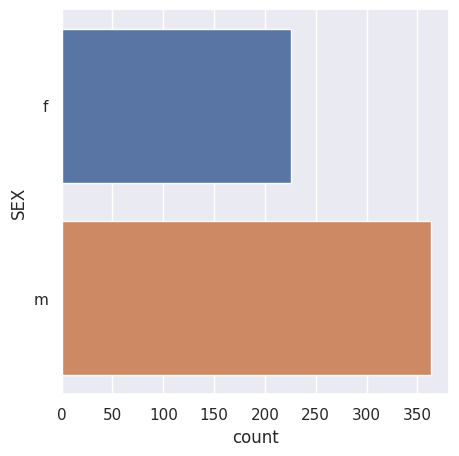

In [41]:
plt.figure(figsize=(5,5))
sns.countplot(y='SEX', data=liver_data)

Number of patients that are male:  526
Number of patients that are female:  24


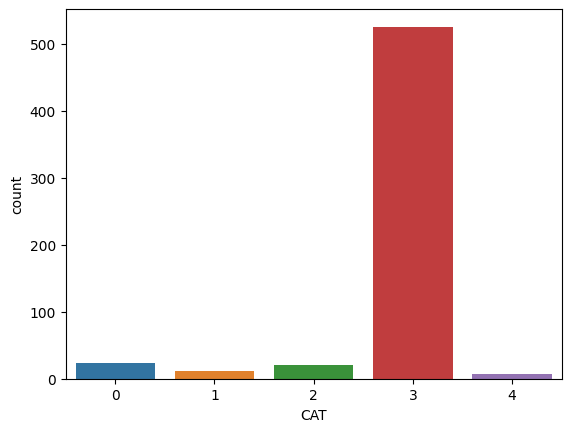

In [26]:
# Plotting the Number of Male and Female patients

sns.countplot(data=liver_data, x = 'CAT', label='COUNT')

M, F = liver_data['CAT'].value_counts().head(2)
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)
plt.show()

In [43]:
liver_data[['SEX', 'CAT','AGE']].groupby(['CAT','SEX'], as_index=False).mean().sort_values(by='CAT', ascending=False)

,CAT,SEX,AGE
8,4,f,59.000000
9,4,m,57.333333
6,3,f,47.106977
7,3,m,47.147799
4,2,f,46.250000
5,2,m,37.200000
2,1,f,53.750000
3,1,m,51.461538
0,0,f,55.500000
1,0,m,52.450000


In [46]:
sns.factorplot (x="AGE", y="SEX", hue="CAT", data=liver_data);

AttributeError: module 'seaborn' has no attribute 'factorplot'

Text(0.5, 0.98, 'Disease by Gender and Age')

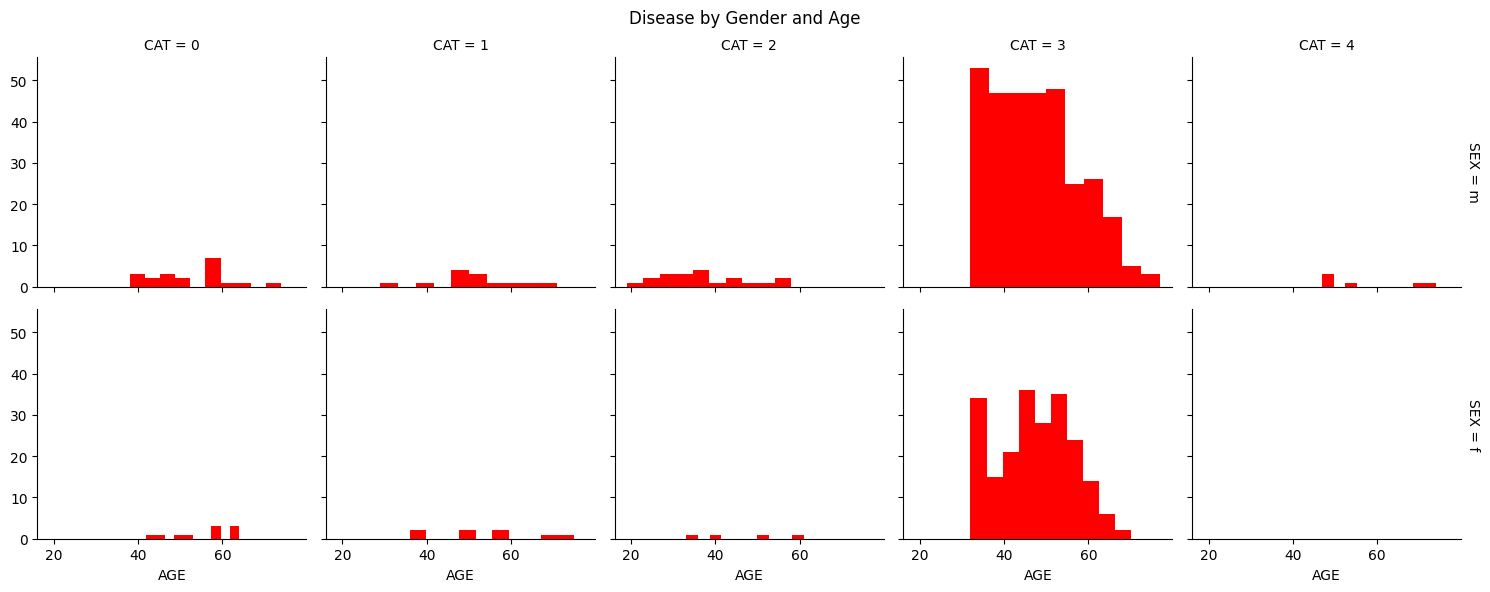

In [30]:
# Plotting Age vs Gender
g = sns.FacetGrid(liver_df, col="CAT", row="SEX", margin_titles=True)
g.map(plt.hist, "AGE", color="red")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender and Age')

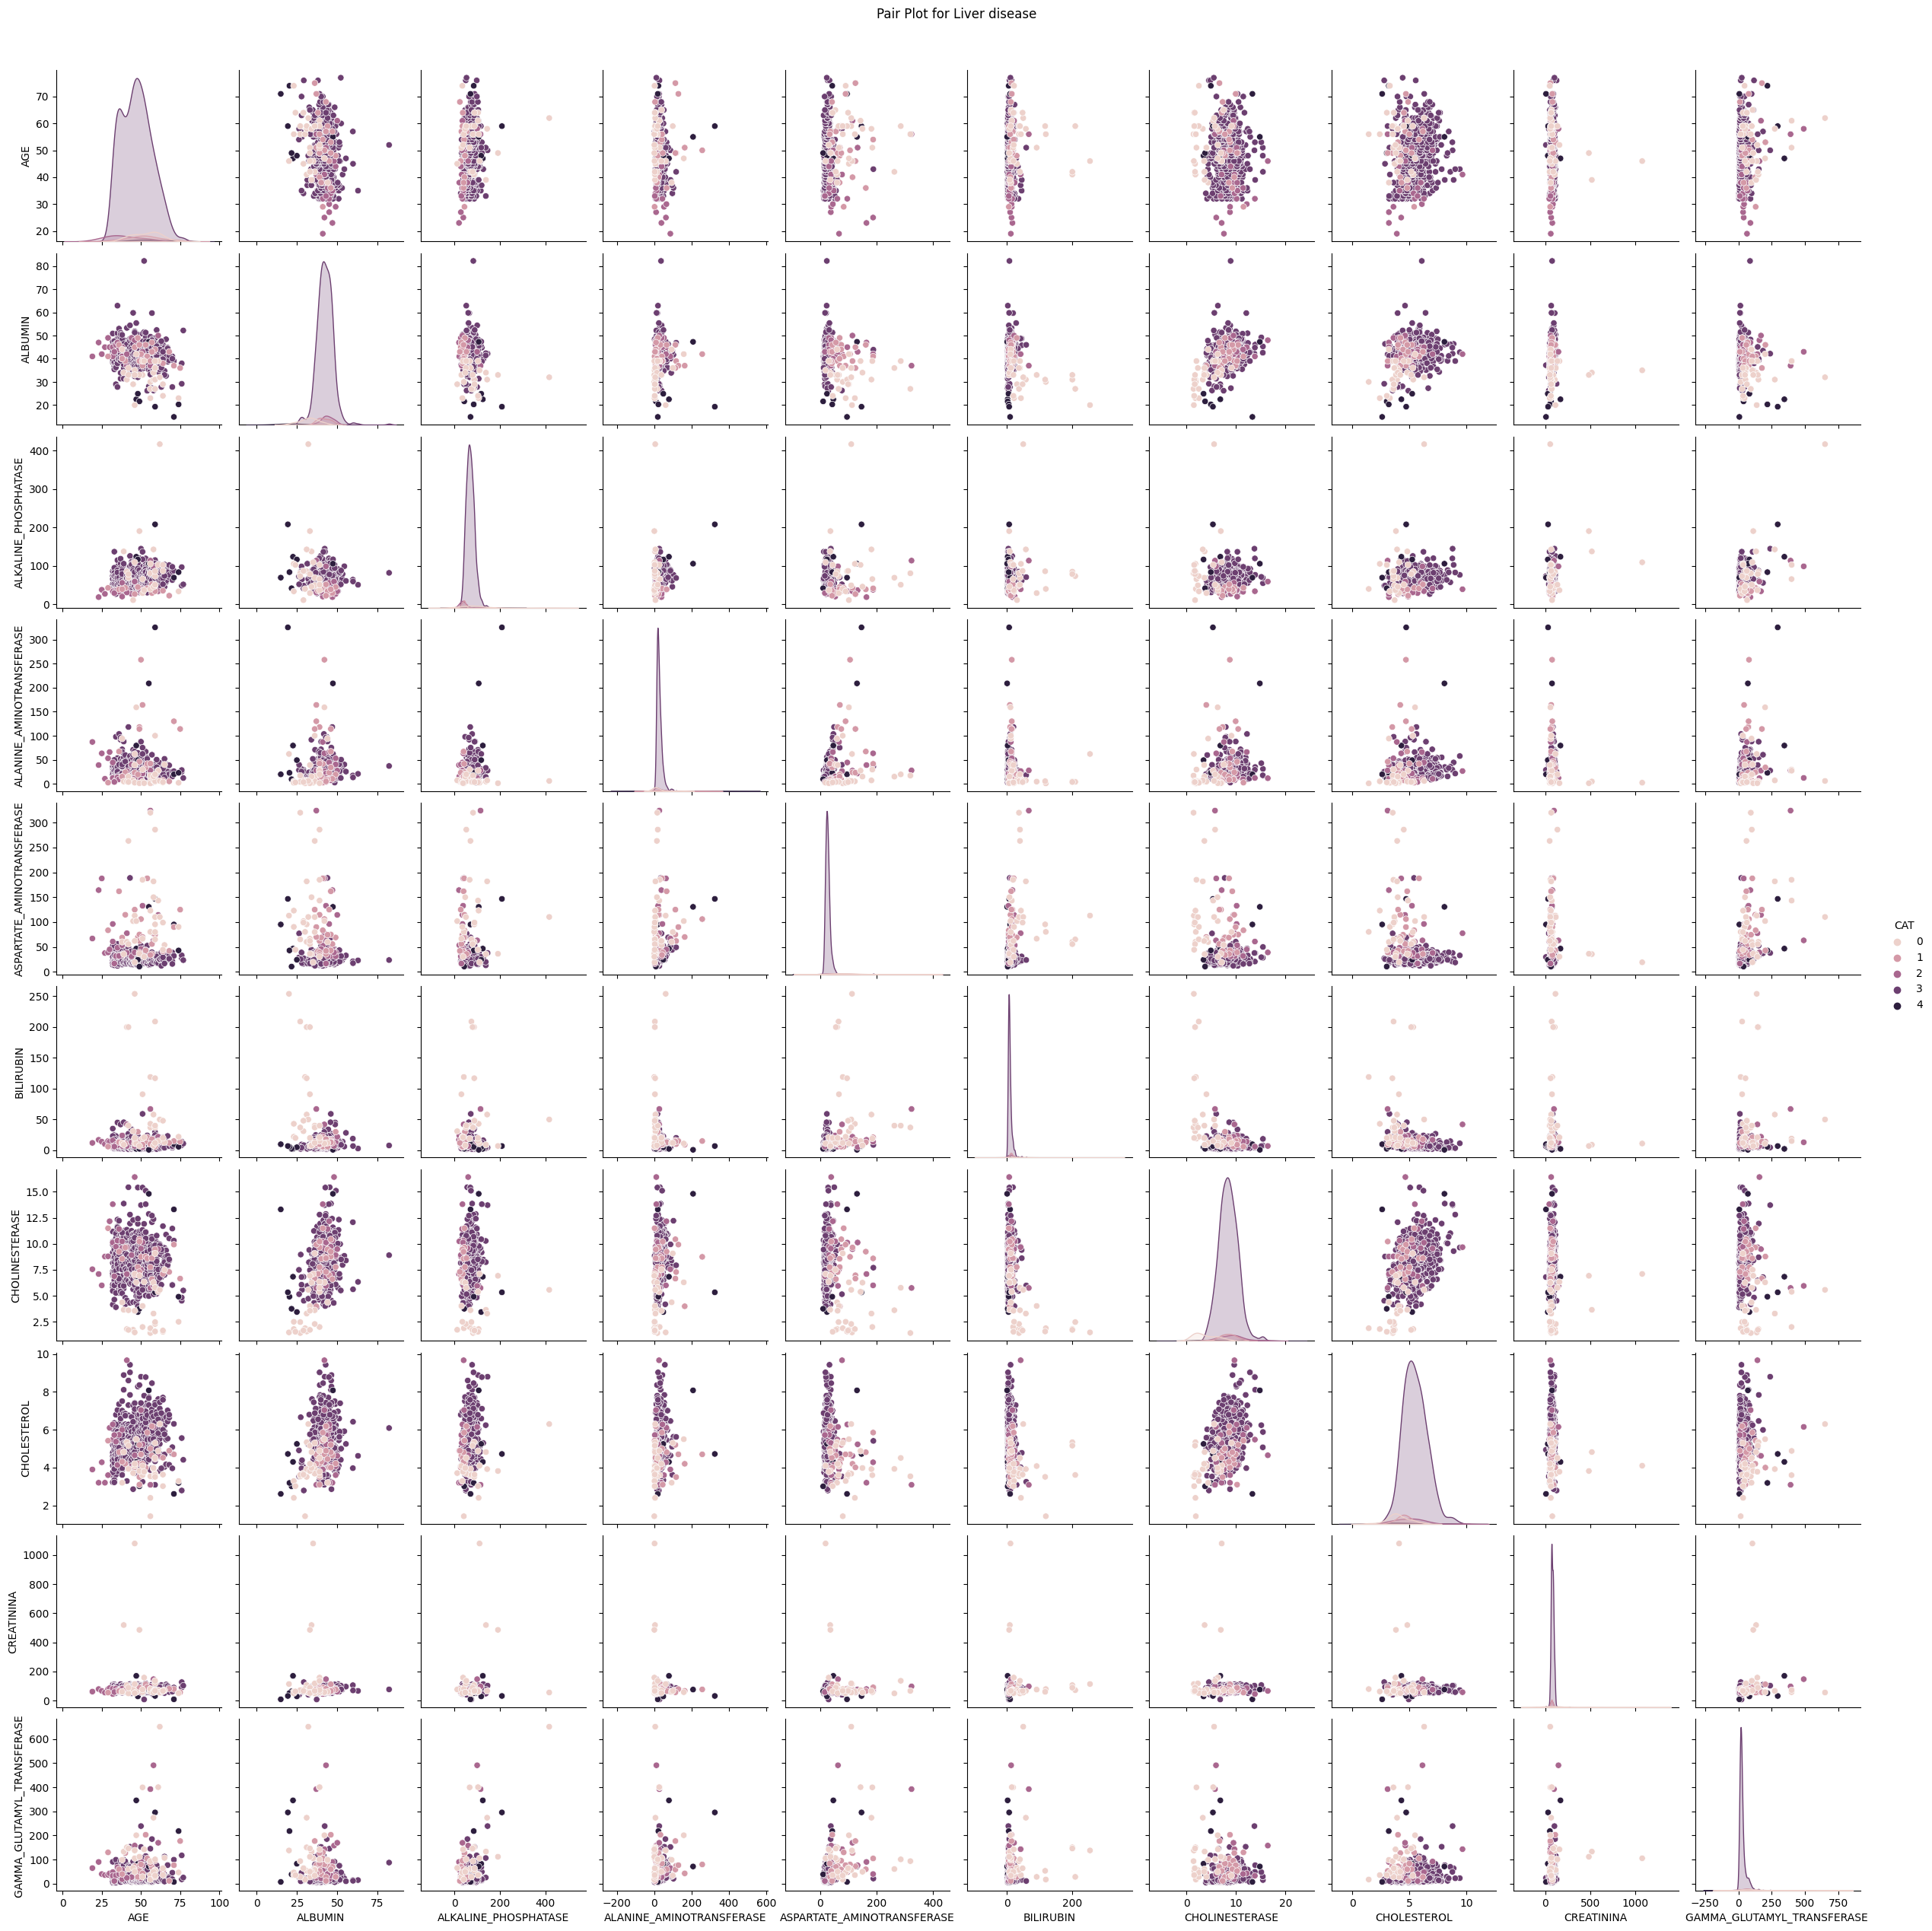

In [31]:
sns.pairplot(liver_df, hue='CAT', diag_kind='kde')
plt.suptitle('Pair Plot for Liver disease', y=1.02)
plt.show()

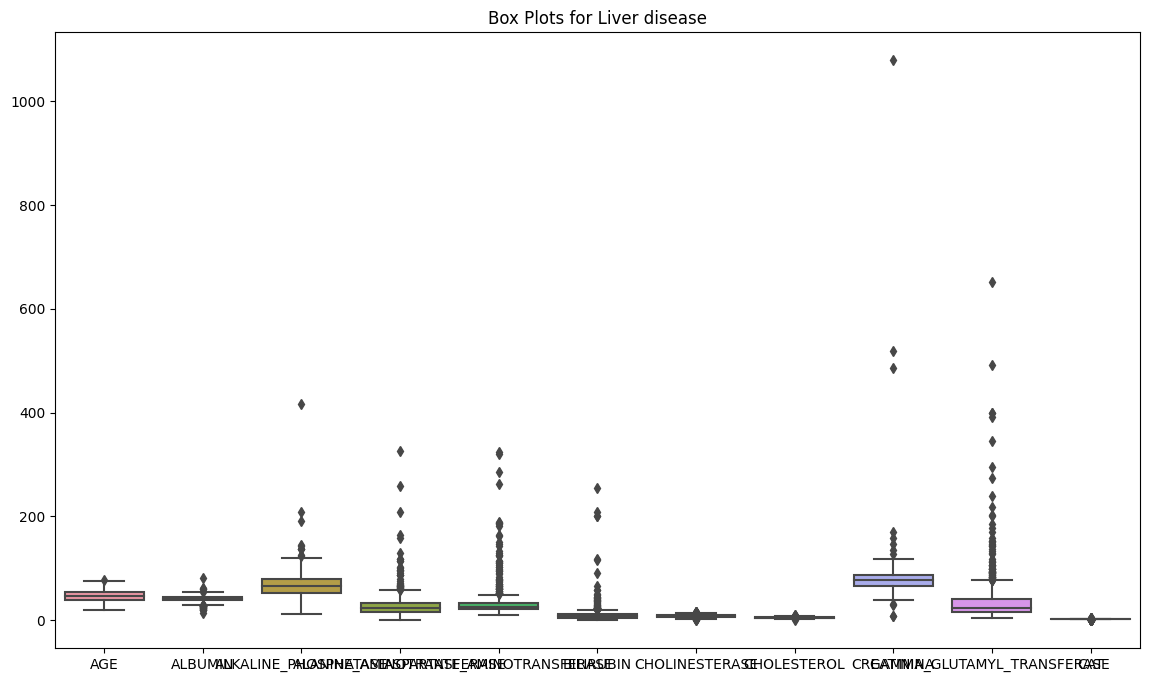

In [32]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=liver_df.select_dtypes(include='number'))
plt.title('Box Plots for Liver disease')
plt.show()

In [33]:
numerical_cols = liver_df.select_dtypes(include='number').columns

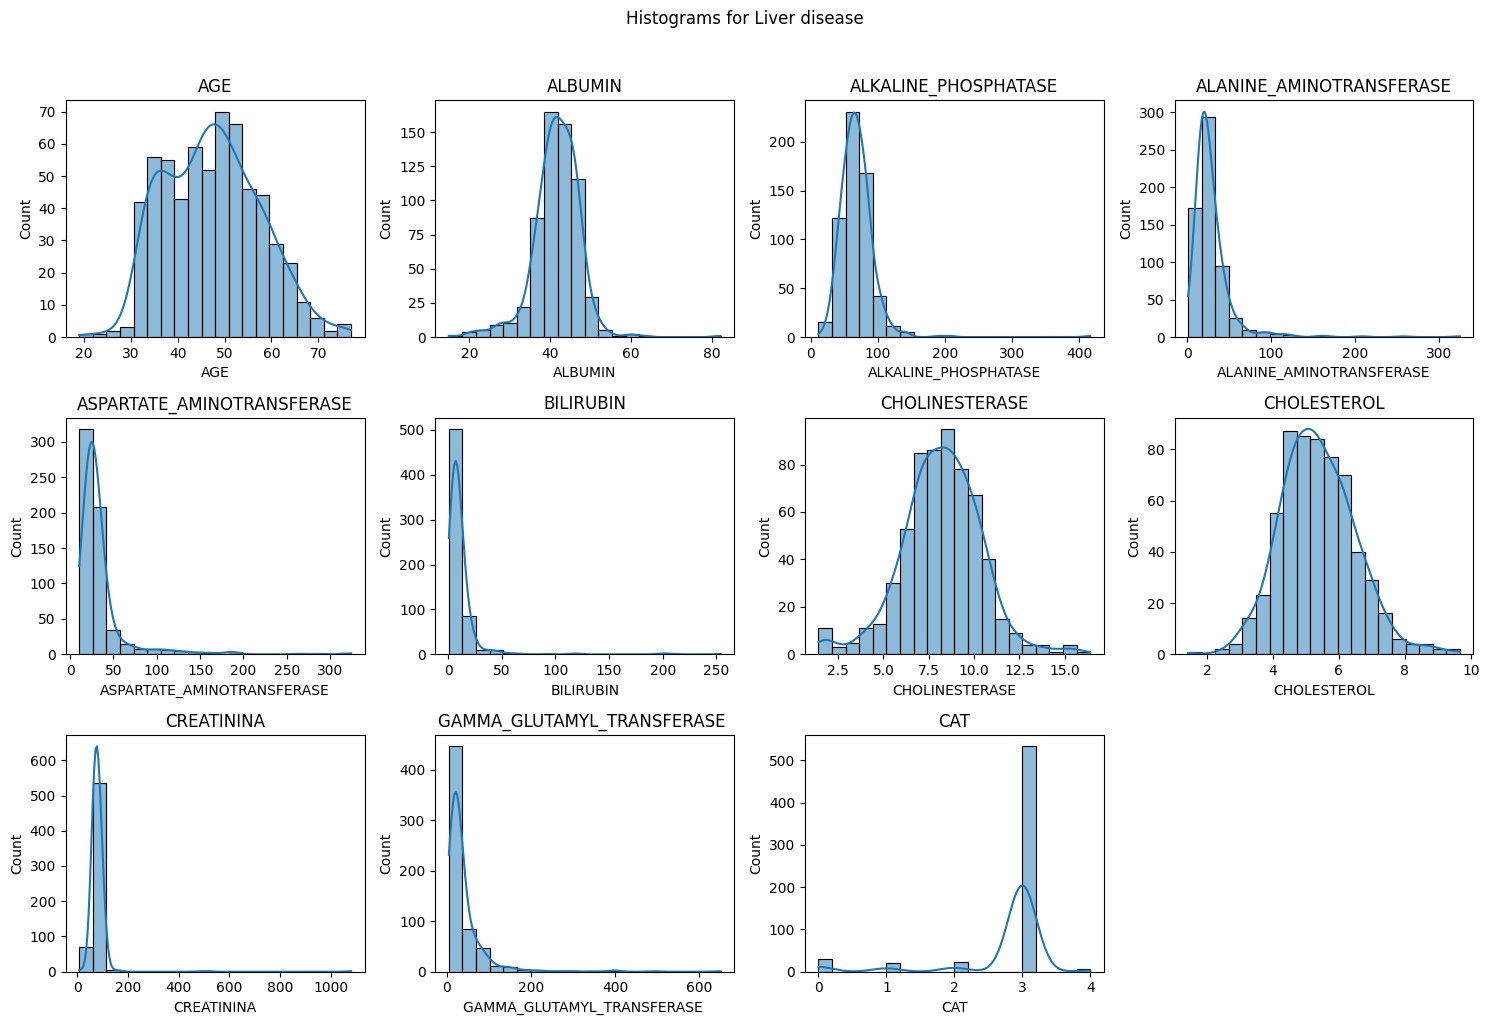

In [34]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 4, i)
    sns.histplot(liver_df[col].dropna(), kde=True, bins=20)
    plt.title(col)

plt.suptitle('Histograms for Liver disease', y=1.02)
plt.tight_layout()
plt.show()